In [20]:
# Importing tensorflow

import tensorflow as tf

In [21]:
# loading the dataset

mnist = tf.keras.datasets.mnist

In [22]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [23]:
# Normalize the data

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [24]:
import matplotlib.pyplot as plt

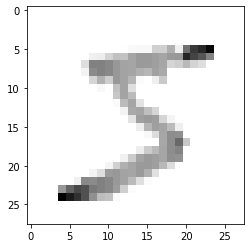

In [25]:
plt.imshow(x_train[0], cmap='binary')

In [26]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [30]:
# MODEL CREATION

# Dense layer creation (FULLY CONNECTED LAYER)
from tensorflow.keras.layers import Dense

# Instantiating sequential model
model = tf.keras.models.Sequential()

# Flattening the data to feed into neural network
model.add(tf.keras.layers.Flatten())

# Adding dense layers with softmax activation at the output
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model to training data
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.2674 - acc: 0.9219
Epoch 2/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.1080 - acc: 0.9665
Epoch 3/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0726 - acc: 0.9772
Epoch 4/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0545 - acc: 0.9822
Epoch 5/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0398 - acc: 0.9868
Epoch 6/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0328 - acc: 0.9889
Epoch 7/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0251 - acc: 0.9915
Epoch 8/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.0214 - acc: 0.9926
Epoch 9/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0183 - acc: 0.9936
Epoch 10/10
60000/60000 [==============================] - 6s 105us/sample

In [31]:
# Validation loss and accuarcy

val_loss, val_accuracy = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 62us/sample - loss: 0.1129 - acc: 0.9760


In [32]:
# Save the model for future use

model.save('my_model.h5')

In [33]:
# Loading the saved model

new_model = tf.keras.models.load_model('my_model.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [34]:
# Predict on new data

predictions = new_model.predict(x_test)

In [35]:
# Probability distribution for each digit (one-hot encoded)

predictions

array([[6.85735970e-17, 1.57949961e-14, 1.28738573e-14, ...,
        1.00000000e+00, 1.80045493e-15, 2.61702379e-12],
       [1.41483235e-16, 1.59968061e-09, 1.00000000e+00, ...,
        1.14094663e-16, 2.28784195e-17, 4.20692697e-24],
       [3.54080584e-11, 9.99995708e-01, 2.53180588e-09, ...,
        3.79623361e-06, 1.97507347e-07, 8.57454718e-10],
       ...,
       [1.88681618e-16, 6.00532735e-10, 2.68457521e-14, ...,
        1.08882624e-07, 5.32996980e-11, 3.48116664e-08],
       [6.40664605e-11, 1.36265256e-14, 3.62587049e-13, ...,
        5.30493809e-11, 1.97083125e-07, 8.49434591e-14],
       [1.26482876e-13, 1.08516567e-17, 4.03269887e-15, ...,
        1.80727838e-18, 3.42843180e-12, 1.93968229e-17]], dtype=float32)

In [36]:
import numpy as np

# Selecting the maximum probability to use as prediction

np.argmax(predictions[0])

7

In [ ]:
'''
SHOWING PREDICTIONS FOR NEW TEST DATA
'''

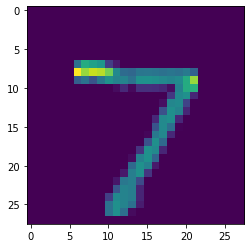

In [37]:
plt.imshow(x_test[0])

In [38]:
np.argmax(predictions[1])

2

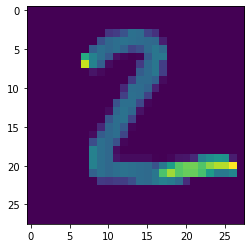

In [39]:
plt.imshow(x_test[1])

In [40]:
np.argmax(predictions[100])

6

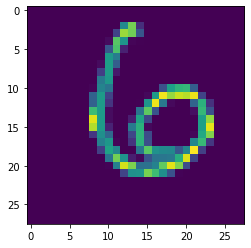

In [41]:
plt.imshow(x_test[100])

In [42]:
np.argmax(predictions[300])

4

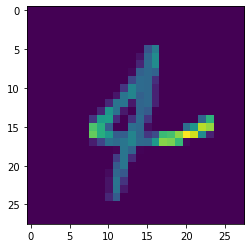

In [43]:
plt.imshow(x_test[300])

In [44]:
np.argmax(predictions[500])

3

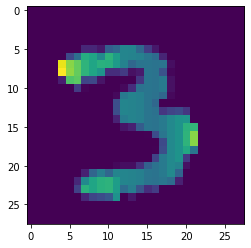

In [45]:
plt.imshow(x_test[500])

In [46]:
np.argmax(predictions[700])

1

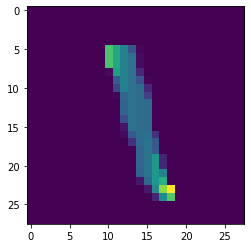

In [47]:
plt.imshow(x_test[700])

In [63]:
# Checking number of samples in the training data for each digit. Done this to verify biasness of any one particular digit
# Here, the number of samples for each digit is about the same. So our model accuracy is true accuracy

counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

x, y = x_train, y_train

for ys in y:
    counter_dict[int(ys)] += 1
    
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [65]:
# Validation loss by the model

val_loss

0.1128815205414503

In [66]:
# Validation accuracy by the model

val_accuracy

0.976

In [70]:
# A dictionary of loss and accuracy

model.history.history

{'loss': [0.2673987278511127,
  0.10795767209182183,
  0.07259752082799872,
  0.054509785562194886,
  0.03984379851277917,
  0.03276026366961499,
  0.025059373882343063,
  0.021368405374116266,
  0.018325454379288324,
  0.014612015823005156],
 'acc': [0.9219,
  0.96653336,
  0.97723335,
  0.98218334,
  0.98681664,
  0.9889333,
  0.99148333,
  0.99255,
  0.9936,
  0.9953667]}

In [72]:
import pandas as pd

# Creating a dataframe to see loss and accuracy in the form of a table

df = pd.DataFrame(model.history.history)

In [73]:
df

,loss,acc
0,0.267399,0.921900
1,0.107958,0.966533
2,0.072598,0.977233
3,0.054510,0.982183
4,0.039844,0.986817
5,0.032760,0.988933
6,0.025059,0.991483
7,0.021368,0.992550
8,0.018325,0.993600
9,0.014612,0.995367


(0.0, 0.3)

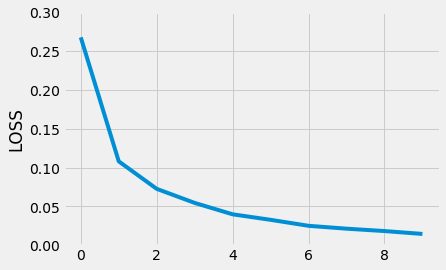

In [85]:
# Plotting the loss and accuracy. Loss doesn't increase at any point and hence model is good

plt.style.use('fivethirtyeight')

plt.plot(df['loss'])
plt.ylabel('LOSS')
plt.ylim([0.00, 0.30])

(0.92, 1)

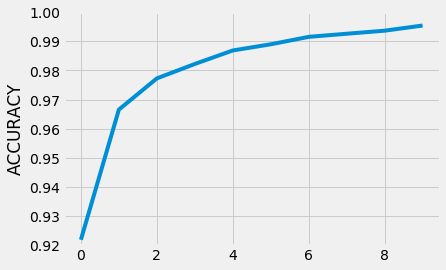

In [82]:
# Accuracy increases steadily initially but converges later

plt.plot(df['acc'])
plt.ylabel('ACCURACY')
plt.ylim([0.92, 1])

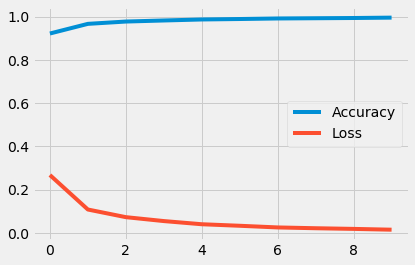

In [88]:
plt.plot(df['acc'], label='Accuracy')
plt.plot(df['loss'], label='Loss')

plt.legend(loc=0)